# **Modelling Data**

Modelling data adalah proses dalam statistik untuk membuat representasi matematis dari suatu sistem atau fenomena berdasarkan data. Model ini digunakan untuk memahami pola, membuat prediksi, atau mengambil keputusan berdasarkan data.

**Tahapan dalam Modelling Data**
* Pengumpulan Data

Mengambil data dari berbagai sumber (database, API, file CSV, dll.).
Contoh: Mengambil data dari PostgreSQL & MySQL dalam kode sebelumnya.


* Pembersihan Data (Data Cleaning)

Menghapus outlier, data yang hilang (missing values), dan data duplikat.
Contoh: Menggunakan Local Outlier Factor (LOF) untuk mendeteksi outlier.


* Eksplorasi Data (Exploratory Data Analysis - EDA)

Menganalisis pola, korelasi antar fitur, dan distribusi data.
Contoh: Visualisasi menggunakan Seaborn untuk melihat sebaran data.


* Pemilihan Fitur (Feature Selection/Engineering)

Memilih fitur yang paling relevan dengan masalah.
Contoh: Menggunakan "petal_length" dan "petal_width" untuk model klasifikasi bunga.


* Pembagian Data (Train-Test Split)

Membagi data menjadi Training Set (80%) dan Testing Set (20%).
Contoh: train_test_split(X, y, test_size=0.2, random_state=42).


* Pemilihan Model

Memilih algoritma yang sesuai: KNN, Decision Tree, SVM, Neural Networks, dll.
Contoh: Menggunakan KNN (K-Nearest Neighbors) dengan n_neighbors=11.


* Training Model (Pelatihan Model)

Model belajar dari Training Data untuk mengenali pola.
Contoh: clf.fit(X_train, y_train).


* Evaluasi Model

Mengukur performa model menggunakan Akurasi, Precision, Recall, dan F1-score.
Contoh: classification_report(y_test, y_pred).


* Visualisasi Hasil & Interpretasi

Menampilkan decision boundary untuk memahami batas klasifikasi model.
Contoh: DecisionBoundaryDisplay.from_estimator().


In [2]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.3 MB/s eta 0:00:00


## Mengambil Data dari Dbeaver

In [3]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-e0bfcfb-syauqifuady76-9d72.k.aivencloud.com",
        user="avnadmin",
        password="AVNS_bnzkAQjTkJGyBzi_GB2",
        database="defaultdb",
        port=23675
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM mad")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-1b41a3bb-ahmadsyauqifuady33-3378.f.aivencloud.com",
        user="avnadmin",
        password="AVNS_-Cfznxfa1-nPQJ9qmWT",
        database="defaultdb",
        port=10733
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM ayam")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa          55.4         65.2           5.1          3.5
  2     Iris-setosa          14.0          2.0          40.9         30.0
  3     Iris-setosa           3.6          1.5           4.7          3.2
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           6.5          1.3
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           4.7          3.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2          33.8         45.4
 13     Iris-setosa           1.4     

## Memfilter Data diatas Menggunakan Metode LOF

In [4]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-e0bfcfb-syauqifuady76-9d72.k.aivencloud.com",
        user="avnadmin",
        password="AVNS_bnzkAQjTkJGyBzi_GB2",
        database="defaultdb",
        port=23675
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM mad")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-1b41a3bb-ahmadsyauqifuady33-3378.f.aivencloud.com",
        user="avnadmin",
        password="AVNS_-Cfznxfa1-nPQJ9qmWT",
        database="defaultdb",
        port=10733
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM ayam")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Pastikan ada kolom numerik untuk LOF
numeric_columns = df_merged.select_dtypes(include=[np.number]).columns

if len(numeric_columns) > 0:
    # Terapkan LOF
    lof = LocalOutlierFactor(n_neighbors=20)
    df_merged['LOF_Score'] = lof.fit_predict(df_merged[numeric_columns])

    # Pisahkan data outlier dan data normal
    df_outliers = df_merged[df_merged['LOF_Score'] == -1]
    df_normal = df_merged[df_merged['LOF_Score'] == 1]

    # Tampilkan jumlah outlier
    print(f"Jumlah data yang terindikasi outlier: {len(df_outliers)}\n")

    # Tampilkan data outlier
    if not df_outliers.empty:
        print("Data yang terdeteksi sebagai outlier:")
        print(df_outliers.to_string(index=False))
    else:
        print("Tidak ada outlier yang terdeteksi.")
else:
    print("Tidak ada kolom numerik untuk LOF.")


Jumlah data yang terindikasi outlier: 15

Data yang terdeteksi sebagai outlier:
 id           class  petal_length  petal_width  sepal_length  sepal_width  LOF_Score
  1     Iris-setosa          55.4         65.2           5.1          3.5         -1
  2     Iris-setosa          14.0          2.0          40.9         30.0         -1
 12     Iris-setosa           1.6          0.2          33.8         45.4         -1
 19     Iris-setosa           1.7          0.3          25.0         11.7         -1
 35     Iris-setosa          75.5         54.1          12.4          6.3         -1
 54 Iris-versicolor           4.0          1.3          23.7          1.5         -1
 59 Iris-versicolor           4.6          1.3          61.6         22.9         -1
 65 Iris-versicolor          35.6          1.3          14.6          3.3         -1
 70 Iris-versicolor           3.9          1.1           5.6         29.5         -1
 77 Iris-versicolor          44.8          1.4          13.5          

## Menampiltakan data yang sudah filter dan mengkelompokkannya menjadi data testing dan data training

In [5]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-e0bfcfb-syauqifuady76-9d72.k.aivencloud.com",
        user="avnadmin",
        password="AVNS_bnzkAQjTkJGyBzi_GB2",
        database="defaultdb",
        port=23675
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM mad")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-1b41a3bb-ahmadsyauqifuady33-3378.f.aivencloud.com",
        user="avnadmin",
        password="AVNS_-Cfznxfa1-nPQJ9qmWT",
        database="defaultdb",
        port=10733
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM ayam")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Pastikan ada kolom numerik untuk LOF
numeric_columns = df_merged.select_dtypes(include=[np.number]).columns

if len(numeric_columns) > 0:
    # Terapkan LOF
    lof = LocalOutlierFactor(n_neighbors=20)
    df_merged['LOF_Score'] = lof.fit_predict(df_merged[numeric_columns])

    # Pisahkan data bersih
    df_cleaned = df_merged[df_merged['LOF_Score'] == 1].drop(columns=['LOF_Score'])

    # Menampilkan data bersih setelah filtering
    print("\nData bersih setelah filtering:")
    print(df_cleaned.to_string(index=False))

    # Pisahkan data menjadi training (80%) dan testing (20%)
    train_data, test_data = train_test_split(df_cleaned, test_size=0.2, random_state=42)

    # Tampilkan jumlah data setelah pembagian
    print(f"\nJumlah data bersih setelah filtering: {len(df_cleaned)}")
    print(f"Jumlah data training: {len(train_data)}")
    print(f"Jumlah data testing: {len(test_data)}")

else:
    print("Tidak ada kolom numerik untuk LOF.")



Data bersih setelah filtering:
 id           class  petal_length  petal_width  sepal_length  sepal_width
  3     Iris-setosa           3.6          1.5           4.7          3.2
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           6.5          1.3
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           4.7          3.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 13     Iris-setosa           1.4          0.1           4.8          3.0
 14     Iris-setosa           1.1          0.1           2.1          5.5
 15     Iris-setosa           1.2          0.2           1.2          5.6
 16   

## Mengkasifikasikan KNN dengan 3 kelas dan Evaluasi model menggunakan akurasi serta mevisualisasikan hasilnya dari 150 data

Akurasi: 0.8333333333333334
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.90      0.95        10
Iris-versicolor       1.00      0.56      0.71         9
 Iris-virginica       0.69      1.00      0.81        11

       accuracy                           0.83        30
      macro avg       0.90      0.82      0.83        30
   weighted avg       0.89      0.83      0.83        30



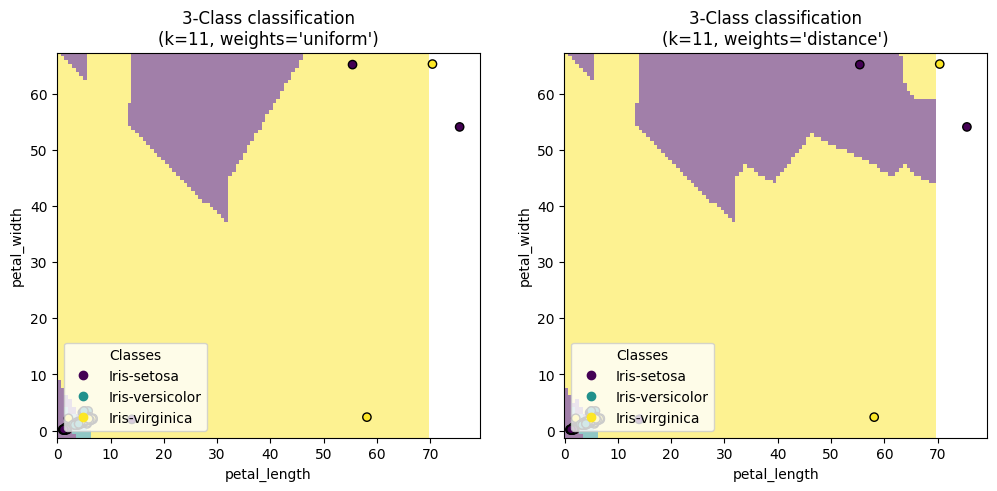

In [6]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-e0bfcfb-syauqifuady76-9d72.k.aivencloud.com",
        user="avnadmin",
        password="AVNS_bnzkAQjTkJGyBzi_GB2",
        database="defaultdb",
        port=23675
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM mad")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-1b41a3bb-ahmadsyauqifuady33-3378.f.aivencloud.com",
        user="avnadmin",
        password="AVNS_-Cfznxfa1-nPQJ9qmWT",
        database="defaultdb",
        port=10733
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM ayam")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil dua fitur utama untuk visualisasi decision boundary
feature_columns = ["petal_length", "petal_width"]
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi Decision Boundary
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

## Mengkasifikasikan KNN dengan 3 kelas dan Evaluasi model menggunakan akurasi serta mevisualisasikan hasilnya dari data yang sudah difilter

Akurasi: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00         6
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        27
      macro avg       1.00      1.00      1.00        27
   weighted avg       1.00      1.00      1.00        27



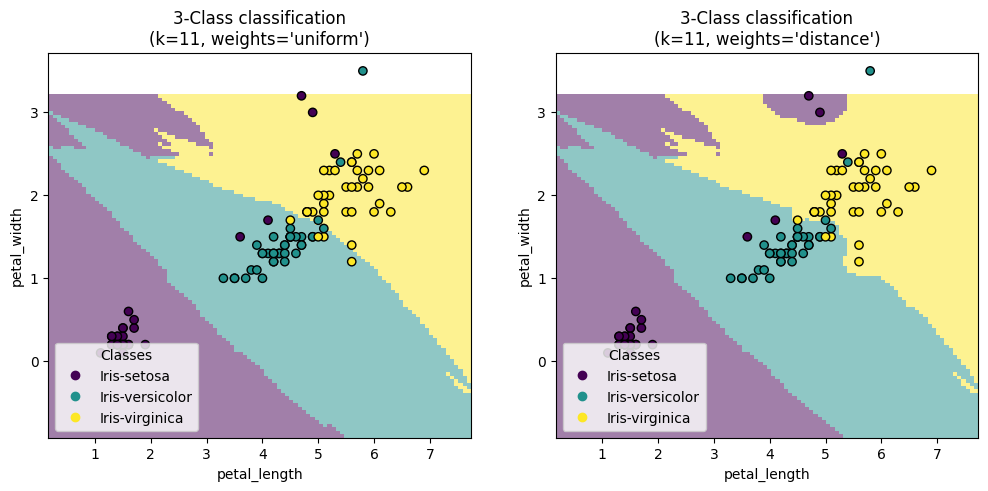

In [7]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-e0bfcfb-syauqifuady76-9d72.k.aivencloud.com",
        user="avnadmin",
        password="AVNS_bnzkAQjTkJGyBzi_GB2",
        database="defaultdb",
        port=23675
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM mad")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-1b41a3bb-ahmadsyauqifuady33-3378.f.aivencloud.com",
        user="avnadmin",
        password="AVNS_-Cfznxfa1-nPQJ9qmWT",
        database="defaultdb",
        port=10733
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM ayam")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil dua fitur utama untuk visualisasi decision boundary
feature_columns = ["petal_length", "petal_width"]
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Mengubah nama kelas menjadi angka

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Menghapus data yang terdeteksi sebagai outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),  # Pastikan target dalam bentuk numerik
    test_size=0.2,
    random_state=42
)

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi Decision Boundary
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()
